In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [255]:
def plot_feature_vs_target(data, feature_col, target_col):
    data = data.copy()
    groups = data[target_col].unique()

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f"Distribution of {feature_col} by {target_col}", fontsize=16)

    # Histogram + KDE
    ax = axes[0,0]
    sns.histplot(data, x=feature_col, hue=target_col, kde=True,
                 element="step", stat="density", common_norm=False, ax=ax, palette="Set1")
    for g in groups:
        vals = data.loc[data[target_col] == g, feature_col].dropna()
        ax.axvline(vals.mean(), linestyle="--", label=f"Mean (target={g}): {vals.mean():.2f}")
        ax.axvline(vals.median(), linestyle=":", label=f"Median (target={g}): {vals.median():.2f}")
    ax.legend()
    ax.set_title("Histogram + KDE with mean/median")

    # Boxplot
    sns.boxplot(data=data, x=target_col, y=feature_col, hue=target_col,
                palette="Set2", showmeans=True, ax=axes[0,1])
    axes[0,1].set_title("Boxplot")

    # Violin plot
    sns.violinplot(data=data, x=target_col, y=feature_col, hue=target_col,
                   palette="Set2", inner="box", density_norm="count",ax=axes[0,2])
    axes[0,2].set_title("Violin Plot")

    # Barplot
    sns.barplot(data=data, x=target_col, y=feature_col, hue=target_col,
                estimator="mean", errorbar="se", palette="Set2", ax=axes[1,0])
    axes[1,0].set_title("Mean ± SE")

    # Q-Q plot
    for g in groups:
        sample = data.loc[data[target_col]==g, feature_col].dropna()
        stats.probplot(sample, dist="norm", plot=axes[1,1])
    axes[1,1].set_title("Q-Q Plot (per group)")

    # Strip plot
    sns.stripplot(data=data, x=target_col, y=feature_col, hue=target_col,
                  palette="Set2", alpha=0.6, jitter=True, ax=axes[1,2])
    axes[1,2].set_title("Strip Plot")

    plt.tight_layout()
    plt.show()


In [256]:
df = pd.read_csv('bank_loan.csv')
df.head(10)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
0,2072-08-01,22,63052,631,Employed,Master,2,18271,12,Married,...,5254.333333,0.639338,3.0,1409,0.167771,0.156702,1654.893043,0.397366,51.0,0
1,2068-04-14,42,62117,522,Employed,Associate,20,29281,108,Divorced,...,5176.416667,0.835783,5.0,106328,0.313281,0.294022,774.117592,0.190888,50.0,0
2,2062-04-07,31,32448,544,Employed,Bachelor,5,33395,60,Divorced,...,2704.000000,0.879069,3.0,8626,0.266395,0.286945,1053.817922,0.531368,54.0,0
3,2031-05-29,19,32182,478,Unemployed,Master,0,49105,24,Single,...,2681.833333,0.868833,7.0,96744,0.285105,0.247245,2614.025710,1.125732,53.0,0
4,2024-04-04,45,77191,646,Employed,Master,21,99655,24,Married,...,6432.583333,0.982722,8.0,16312,0.251655,0.256010,5348.835792,0.924642,52.0,0
5,2047-04-28,33,65873,557,Employed,High School,7,19659,96,Single,...,5489.416667,0.915246,5.0,222388,0.276159,0.273136,505.756751,0.137311,49.0,0
6,2032-09-16,26,53062,541,Employed,High School,4,30742,48,Single,...,4421.833333,0.736825,5.0,6749,0.255242,0.208924,950.169902,0.317101,56.0,0
7,2037-07-26,47,99221,566,Employed,Associate,28,21627,60,Single,...,8268.416667,0.785927,3.0,154698,0.243627,0.223010,601.021712,0.135337,41.6,1
8,2066-03-18,21,15000,573,Employed,Bachelor,0,29320,96,Single,...,1250.000000,0.707809,4.0,41112,0.277820,0.275320,758.657448,1.026926,51.0,0
9,2064-04-02,28,46213,601,Employed,Associate,7,17255,84,Single,...,3851.083333,0.798075,7.0,72669,0.241755,0.210898,394.570618,0.204247,47.0,0


<h2>Banking Loan Dataset Variables</h2>
<h3>The banking loan dataset consists of 2050 records of data in 36 distinct columns(variables) which can be divided into 5 main categories as such <h3>
<h3>Applicant's Personal & Employment Details</h3>
    <ul>
        <li><b>ApplicationDate:</b> The date the loan application was submitted.</li>
        <li><b>Age:</b> The applicant's age in years.</li>
        <li><b>MaritalStatus:</b> The applicant's marital status (e.g., 'Single', 'Married').</li>
        <li><b>NumberOfDependents:</b> How many people rely on the applicant financially.</li>
        <li><b>EducationLevel:</b> The highest level of education the applicant has completed.</li>
        <li><b>EmploymentStatus:</b> The applicant's current employment situation (e.g., 'Employed', 'Self-employed').</li>
        <li><b>Experience:</b> The applicant's total years of professional experience.</li>
        <li><b>JobTenure:</b> How long the applicant has been at their current job, usually in years.</li>
        <li><b>HomeOwnershipStatus:</b> Whether the applicant rents, owns their home, or has a mortgage.</li>
    </ul>

<h3>Applicant's Financial Profile</h3>
    <ul>
        <li><b>AnnualIncome:</b> The total income the applicant earns in a year before taxes.</li>
        <li><b>MonthlyIncome:</b> The total income the applicant earns in a month before taxes.</li>
        <li><b>SavingsAccountBalance:</b> The total amount of money in the applicant's savings account.</li>
        <li><b>CheckingAccountBalance:</b> The total amount of money in the applicant's checking account.</li>
        <li><b>TotalAssets:</b> The total value of everything the applicant owns (cash, investments, property).</li>
        <li><b>TotalLiabilities:</b> The total amount of debt the applicant owes (other loans, credit card debt).</li>
        <li><b>NetWorth:</b> The applicant's total assets minus their total liabilities.</li>
        <li><b>MonthlyDebtPayments:</b> The total amount the applicant pays towards existing debts each month.</li>
    </ul>

<h3>Applicant's Credit History</h3>
    <ul>
        <li><b>CreditScore:</b> A number representing the applicant's creditworthiness.</li>
        <li><b>LengthOfCreditHistory:</b> How many years the applicant has been using credit.</li>
        <li><b>NumberOfOpenCreditLines:</b> The total number of active credit accounts the applicant has.</li>
        <li><b>CreditCardUtilizationRate:</b> The percentage of the applicant's total available credit that they are currently using.</li>
        <li><b>NumberOfCreditInquiries:</b> How many times lenders have formally checked the applicant's credit history recently.</li>
        <li><b>BankruptcyHistory:</b> Whether the applicant has ever declared bankruptcy.</li>
        <li><b>PreviousLoanDefaults:</b> The number of times the applicant has failed to repay a loan in the past.</li>
        <li><b>PaymentHistory:</b> A summary of the applicant's past payment behavior (e.g., 'All payments on time').</li>
        <li><b>UtilityBillsPaymentHistory:</b> A summary of how reliably the applicant pays their utility bills.</li>
    </ul>

<h3>Loan Details</h3>
    <ul>
        <li><b>LoanAmount:</b> The amount of money the applicant is requesting.</li>
        <li><b>LoanDuration:</b> The length of time (e.g., in months or years) over which the loan will be repaid.</li>
        <li><b>LoanPurpose:</b> The reason the applicant is seeking the loan (e.g., 'Car Loan').</li>
        <li><b>MonthlyLoanPayment:</b> The estimated amount the applicant would have to pay each month for this specific loan.</li>
    </ul>

<h3>Bank's Calculated Metrics & Decision</h3>
    <ul>
        <li><b>DebtToIncomeRatio:</b> The applicant's total monthly debt payments divided by their gross monthly income.</li>
        <li><b>TotalDebtToIncomeRatio:</b> May include the new potential loan payment in the debt-to-income calculation.</li>
        <li><b>BaseInterestRate:</b> A standard interest rate set by the bank before applicant-specific adjustments.</li>
        <li><b>InterestRate:</b> The final interest rate offered to the applicant for this loan.</li>
        <li><b>RiskScore:</b> An internal score calculated by the bank to estimate the risk of lending to this applicant.</li>
        <li><b>LoanApproved:</b> The target variable; indicates if the loan was approved (1) or denied (0).</li>
    </ul>

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             2050 non-null   object 
 1   Age                         2050 non-null   int64  
 2   AnnualIncome                2050 non-null   int64  
 3   CreditScore                 2050 non-null   int64  
 4   EmploymentStatus            1976 non-null   object 
 5   EducationLevel              2050 non-null   object 
 6   Experience                  2050 non-null   int64  
 7   LoanAmount                  2050 non-null   object 
 8   LoanDuration                2050 non-null   int64  
 9   MaritalStatus               2050 non-null   object 
 10  NumberOfDependents          1963 non-null   float64
 11  HomeOwnershipStatus         1951 non-null   object 
 12  MonthlyDebtPayments         2009 non-null   float64
 13  CreditCardUtilizationRate   2050 

In [201]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
count,2050.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,1963.000000,2009.000000,2050.000000,2050.000000,2050.000000,...,2050.000000,2050.000000,1936.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,39.952195,1.558224e+05,572.662927,17.353659,54.058537,1.455425,457.295669,0.294761,2.848780,0.968780,...,4759.490569,0.791977,5.076963,7.737341e+04,0.240882,0.240792,931.094014,0.405455,50.774927,0.239024
std,11.702246,9.780950e+05,63.820500,11.614698,24.404283,1.367463,239.521001,0.162348,1.899773,0.969018,...,3156.760304,0.122874,2.229185,1.340863e+05,0.035993,0.042887,710.769016,0.334684,7.745501,0.426592
min,18.000000,1.500000e+04,384.000000,-4.000000,12.000000,0.000000,85.000000,0.004364,-4.000000,0.000000,...,625.000000,0.276100,0.000000,1.018000e+03,0.130338,0.113310,118.491581,0.034436,30.400000,0.000000
25%,32.000000,3.274900e+04,538.000000,9.000000,36.000000,0.000000,289.000000,0.169033,2.000000,0.000000,...,2586.062500,0.712901,3.000000,9.073750e+03,0.215449,0.210321,511.277136,0.180706,46.000000,0.000000
50%,40.000000,4.926900e+04,575.000000,17.000000,48.000000,1.000000,405.000000,0.278739,3.000000,1.000000,...,3869.750000,0.809762,5.000000,3.569450e+04,0.238110,0.237375,735.522113,0.305972,51.000000,0.000000
75%,48.000000,7.434200e+04,608.000000,25.000000,72.000000,2.000000,568.000000,0.401770,4.000000,2.000000,...,5931.875000,0.887293,6.000000,9.202675e+04,0.264231,0.268571,1118.015055,0.518579,56.000000,0.000000
max,80.000000,1.000000e+07,950.000000,60.000000,120.000000,5.000000,2375.000000,0.835776,10.000000,5.000000,...,21606.500000,0.996563,12.000000,1.645402e+06,0.384555,0.395984,7859.855080,4.143180,76.000000,1.000000


/tmp/ipykernel_16726/1165855718.py:16: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



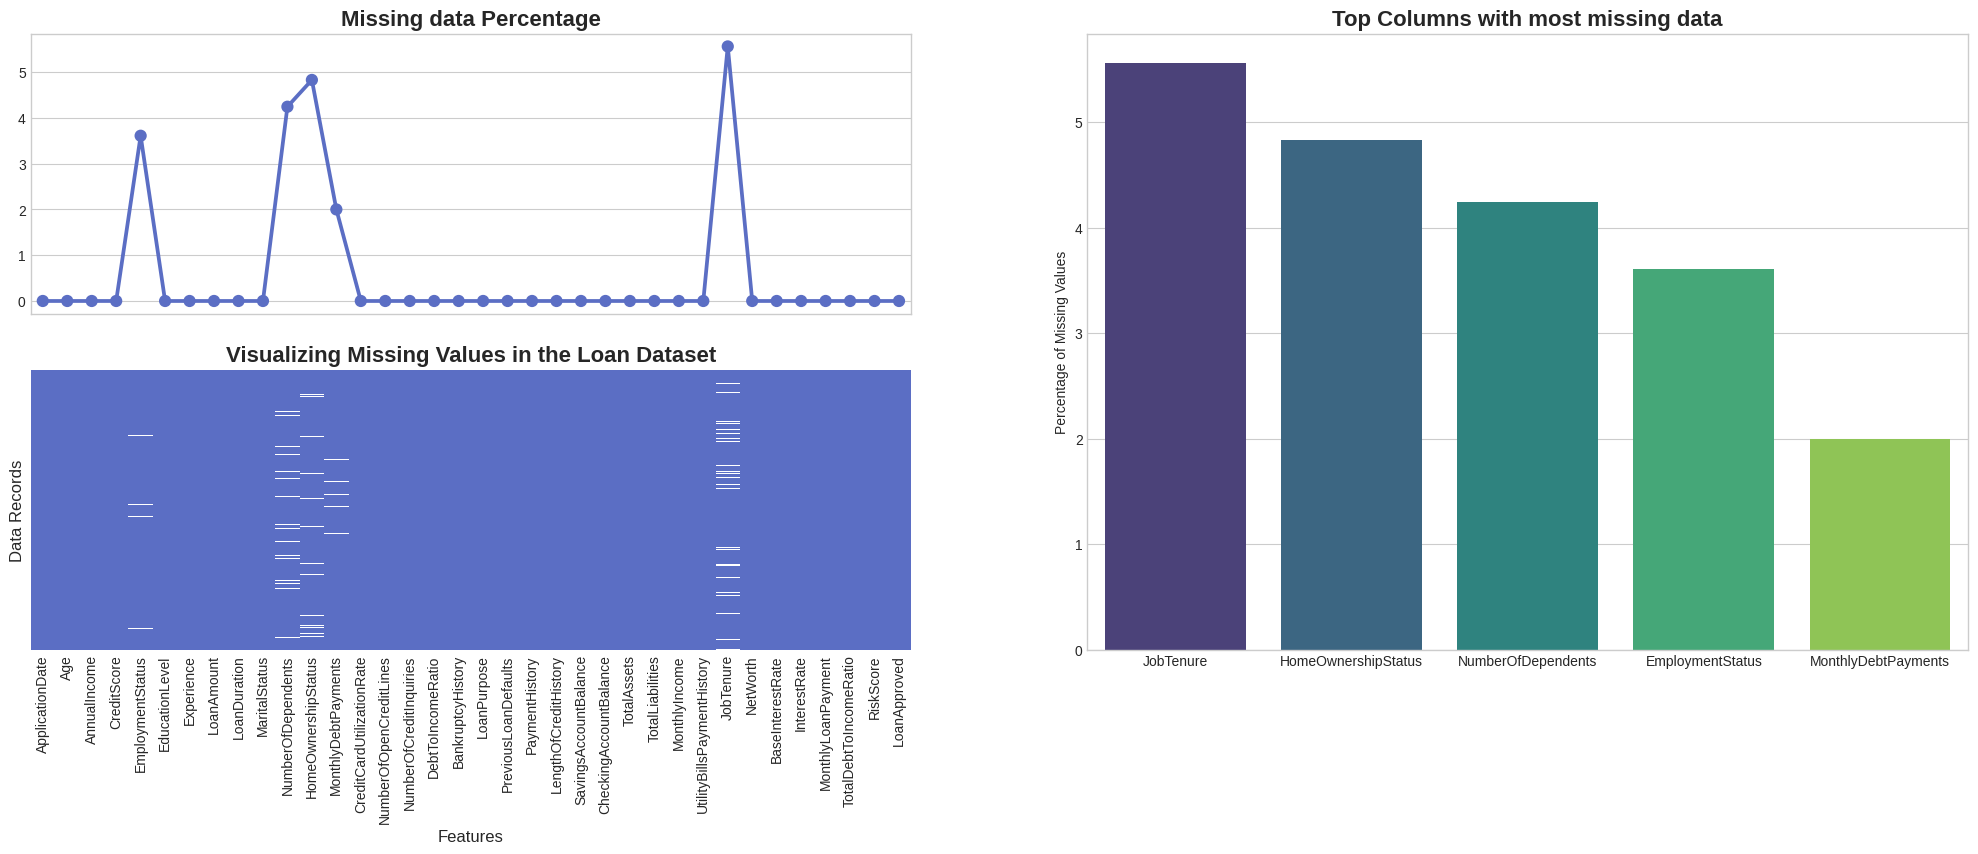

In [202]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(2, 2, figsize=(25, 8))
null_df = df.isnull().sum() /df.shape[0] * 100
missing = null_df[null_df > 0].sort_values(ascending=False)



# --- pointplot of % of Missing Values ---
plt.subplot(2, 2, 1)
ax = sns.pointplot(x=null_df.index, y=null_df.values, color="#5b6ec4")
plt.title("Missing data Percentage", fontsize=16, weight='bold')
ax.set_xticklabels([])

# --- hbar of % of Missing Values ---
plt.subplot(1, 2, 2)
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.title("Top Columns with most missing data", fontsize=16, weight='bold')
plt.ylabel("Percentage of Missing Values")

# --- Heatmap of Missing Values ---
bw_cmap = ListedColormap(["#5b6ec4", "white"])
plt.subplot(2, 2, 3)
sns.heatmap(df.isnull(), cbar=False, cmap=bw_cmap, yticklabels=False)
plt.title('Visualizing Missing Values in the Loan Dataset', fontsize=16, weight='bold')
plt.ylabel('Data Records', fontsize=12)
plt.xlabel('Features', fontsize=12)



plt.show()


In [203]:
def transform_data(df):
    new_df = df.copy()
    # Convert 'ApplicationDate' to datetime
    new_df['ApplicationDate'] = pd.to_datetime(new_df['ApplicationDate'], format='%Y-%m-%d')
    new_df['ApplicationYear'] = new_df['ApplicationDate'].dt.year
    new_df['ApplicationMonth'] = new_df['ApplicationDate'].dt.month
    new_df['ApplicationDay'] = new_df['ApplicationDate'].dt.day

    new_df.drop(columns=['ApplicationDate'], inplace=True)

In [204]:
df['PaymentHistory'].max()

41

In [269]:
homeowner = df[['HomeOwnershipStatus', 'AnnualIncome', 'LoanApproved', 'MonthlyIncome']].copy()

In [270]:
# mortgage_owners = df[df['HomeOwnershipStatus'] == 'Mortgage'][['AnnualIncome', 'HomeOwnershipStatus']]
# other_owners = df[df['HomeOwnershipStatus'] == 'Other'][['AnnualIncome', 'HomeOwnershipStatus']]
# own_owners = df[df['HomeOwnershipStatus'] == 'Own'][['AnnualIncome', 'HomeOwnershipStatus']]
# rent_owners =df[df['HomeOwnershipStatus'] == 'Rent'][['AnnualIncome', 'HomeOwnershipStatus']]

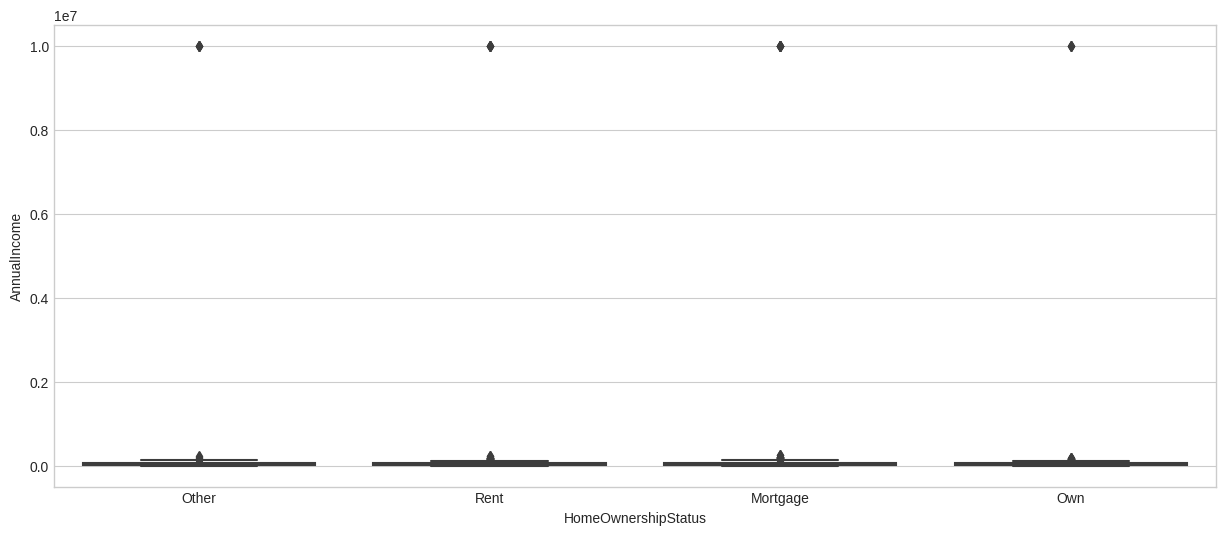

In [271]:
plt.figure(figsize=(15,6))
sns.boxplot(x='HomeOwnershipStatus', y='AnnualIncome', data=homeowner)
plt.show()

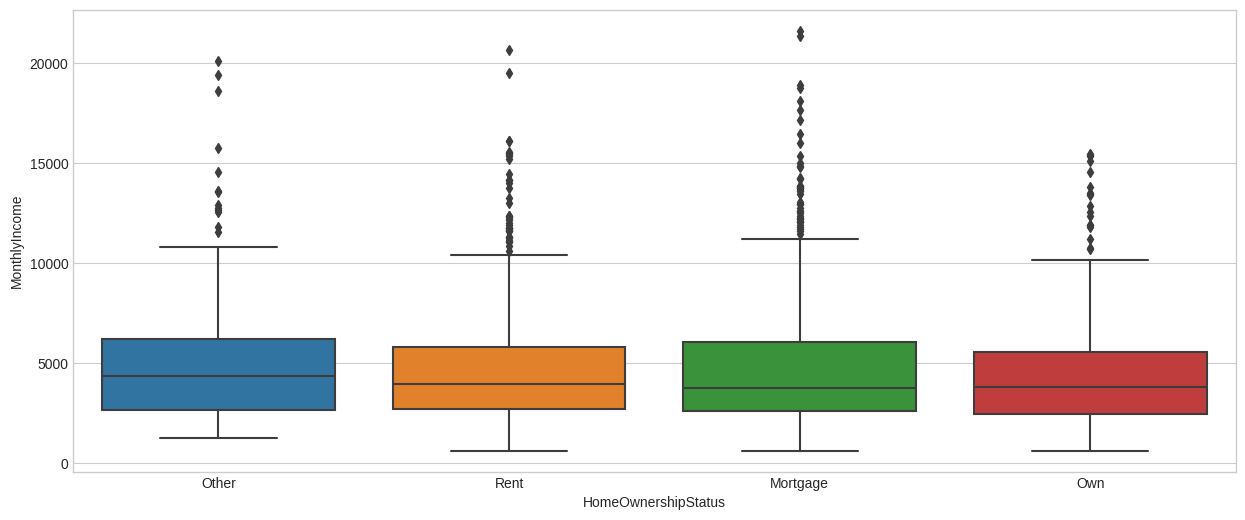

In [272]:
plt.figure(figsize=(15,6))
sns.boxplot(x='HomeOwnershipStatus', y='MonthlyIncome', data=homeowner)
plt.show()

In [273]:
df[df['AnnualIncome'] >= 1e7]

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore,LoanApproved
45,2072-07-31,25,10000000,590,Employed,Bachelor,0,32537,72,Divorced,...,9835.666667,0.534643,5.0,10650,0.252537,0.273780,924.522897,0.153474,50.0,0
61,2051-05-25,42,10000000,597,Employed,Associate,17,21882,84,Divorced,...,2911.916667,0.759398,5.0,112385,0.248382,0.248875,552.296081,0.350386,47.0,0
84,2051-12-16,37,10000000,614,Self-Employed,Master,14,66159,48,Single,...,5008.750000,0.736770,5.0,25132,0.254159,0.267376,2258.244385,0.525929,60.0,0
122,2046-02-25,52,10000000,575,Employed,Bachelor,28,9260,48,Married,...,4227.083333,0.888064,5.0,10751,0.216760,0.245379,304.653074,0.172063,40.0,1
263,2055-11-20,39,10000000,437,Employed,Associate,13,13106,72,Divorced,...,8238.000000,0.987532,5.0,3658,0.309606,0.252615,355.144493,0.071758,43.2,1
295,2045-06-27,63,10000000,650,Employed,Bachelor,40,34632,48,Widowed,...,6960.250000,0.549076,4.0,9201,0.204632,0.185740,1027.732131,0.218057,44.0,0
548,2044-06-21,28,10000000,595,Employed,Bachelor,6,31778,60,Married,...,4519.250000,0.775941,3.0,47534,0.239278,0.287134,1003.154832,0.441700,57.0,0
635,2062-09-28,56,10000000,593,Employed,Bachelor,34,13814,12,Married,...,20083.833333,0.896038,6.0,45835,0.182314,0.180172,1266.580332,0.074616,41.6,1
672,2034-08-13,50,10000000,481,Employed,Bachelor,25,20303,48,Married,...,3537.083333,0.870611,6.0,73144,0.274803,0.245733,668.365772,0.306288,48.0,0
781,2023-12-06,27,10000000,545,Employed,Bachelor,3,8380,96,Divorced,...,6438.666667,0.731124,4.0,166054,0.270880,0.313641,239.112274,0.071305,50.0,0


/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_gr

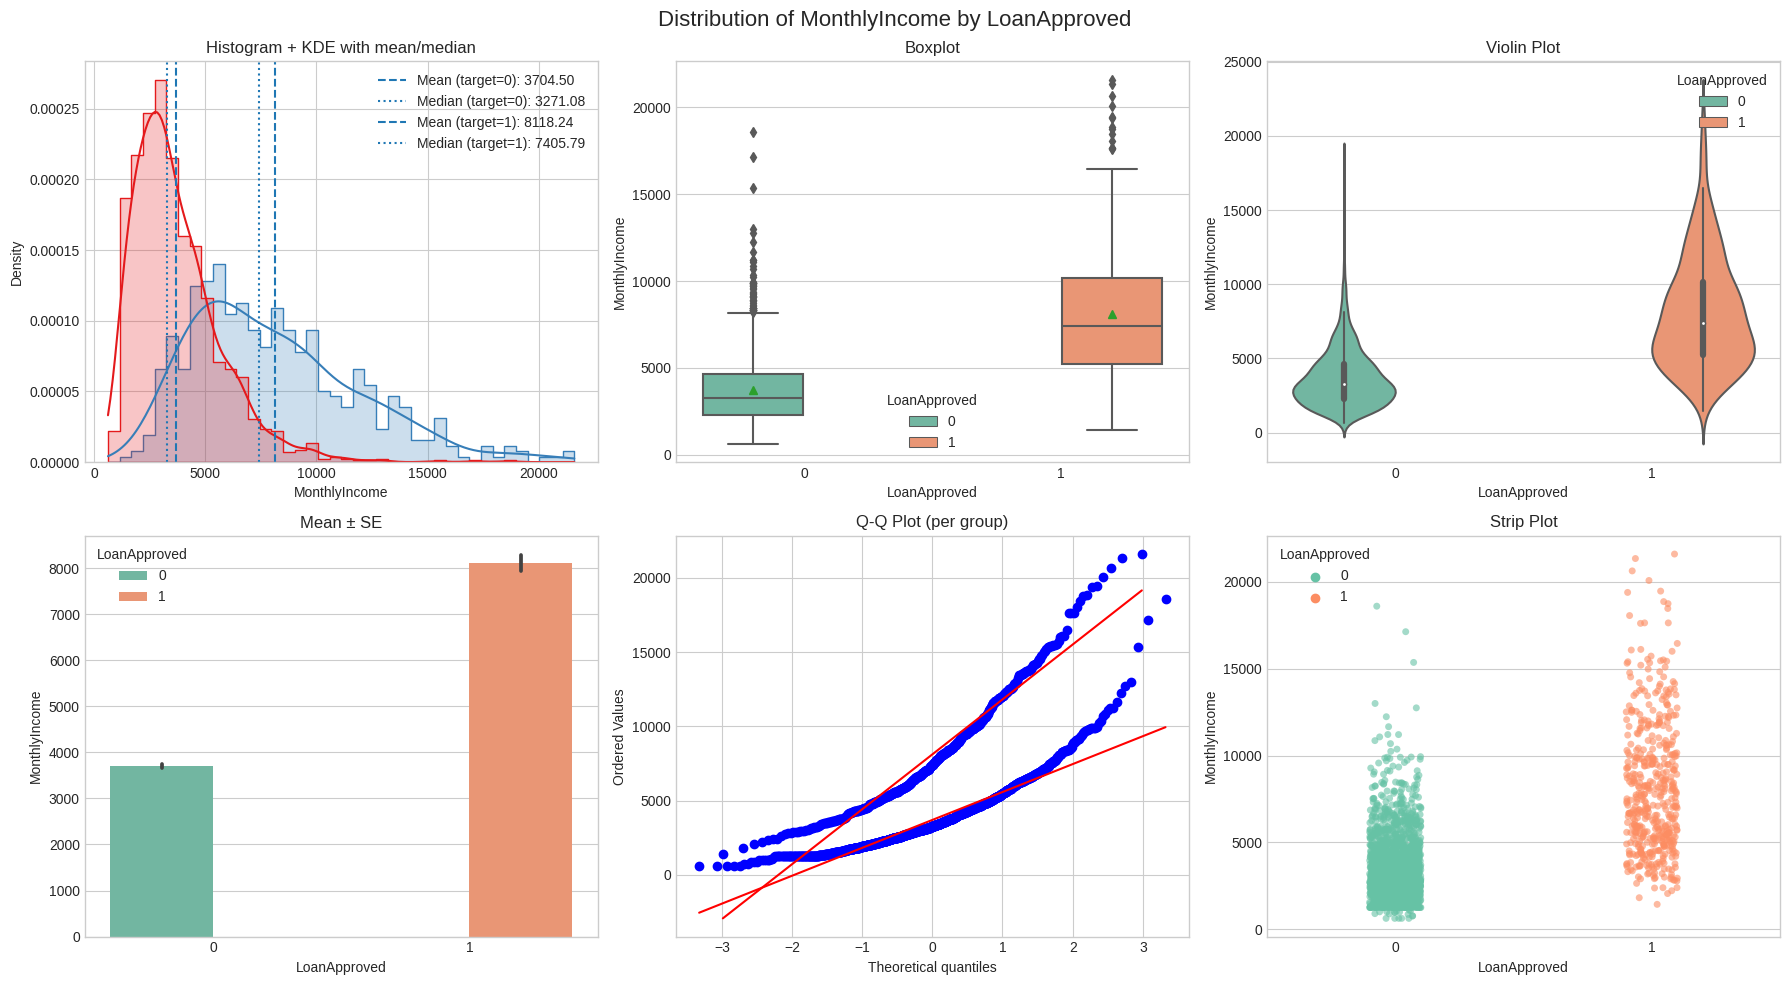

In [274]:
plot_feature_vs_target(homeowner, feature_col="MonthlyIncome", target_col="LoanApproved")

These guys have 10M $ annualIncome becoming outlier in every homeownership category.

/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/arash/App/anaconda/envs/QBX/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_gr

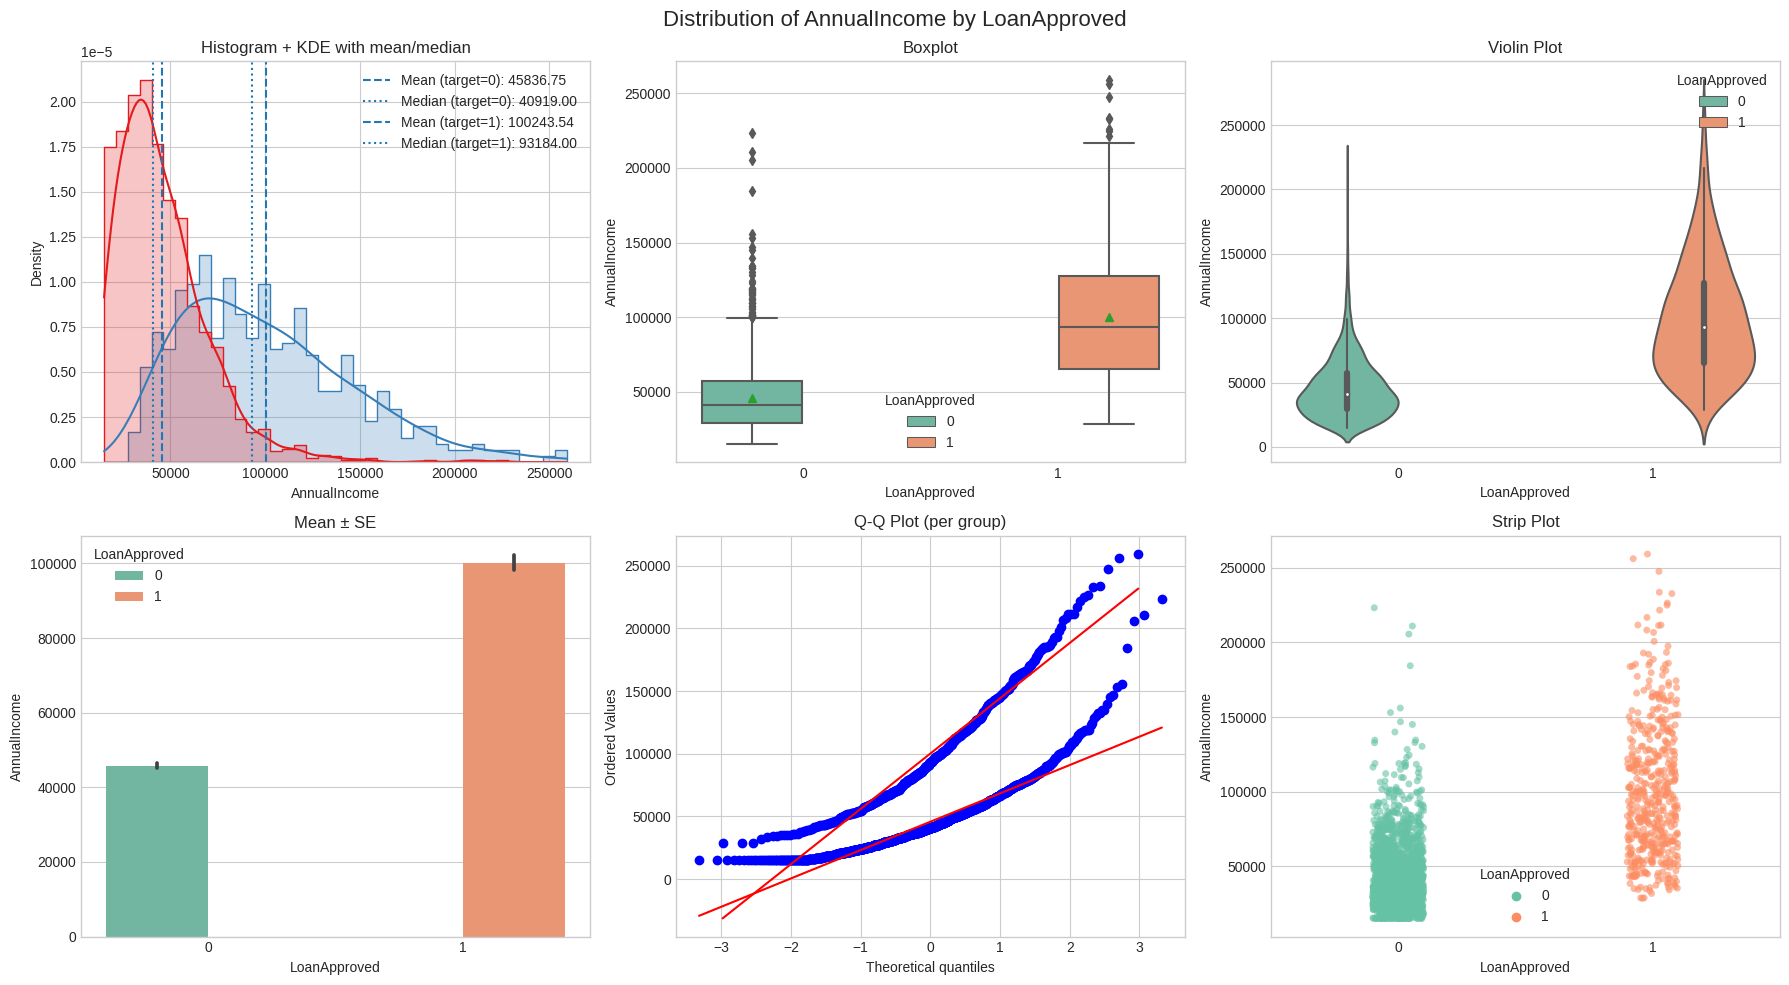

In [264]:
plot_feature_vs_target(homeowner, feature_col="AnnualIncome", target_col="LoanApproved")

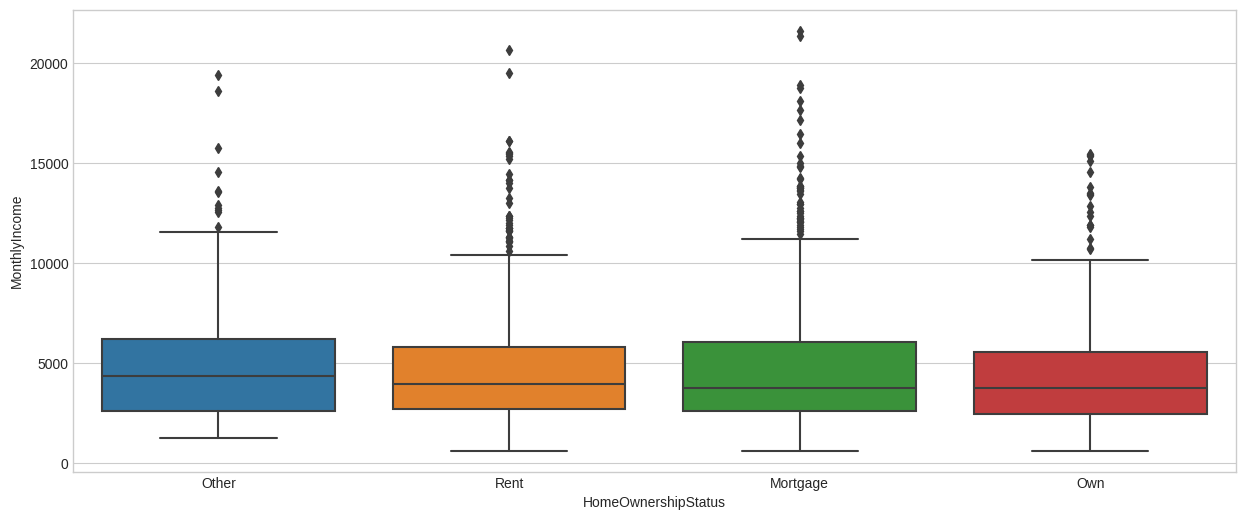

In [265]:
plt.figure(figsize=(15,6))
sns.boxplot(x='HomeOwnershipStatus', y='MonthlyIncome', data=homeowner)
plt.show()

In [276]:
df['YearlyIncome'] = df['MonthlyIncome'] * 12

In [281]:
df[['AnnualIncome', 'YearlyIncome']].head(20)

,AnnualIncome,YearlyIncome
0,63052,63052.0
1,62117,62117.0
2,32448,32448.0
3,32182,32182.0
4,77191,77191.0
5,65873,65873.0
6,53062,53062.0
7,99221,99221.0
8,15000,15000.0
9,46213,46213.0


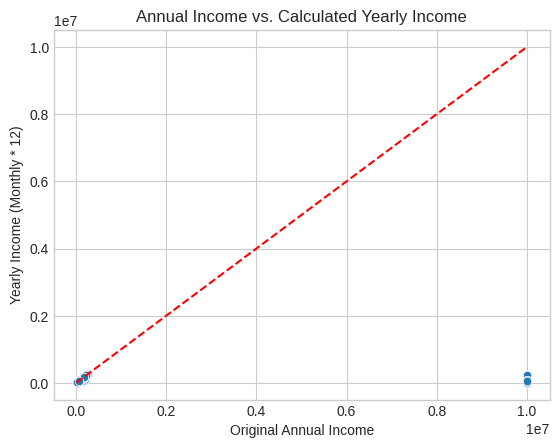

In [ ]:
sns.scatterplot(data=df, x='AnnualIncome', y='YearlyIncome')

min_val = min(df['AnnualIncome'].min(), df['YearlyIncome'].min())
max_val = max(df['AnnualIncome'].max(), df['YearlyIncome'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title('Annual Income vs. Calculated Yearly Income')
plt.xlabel('Original Annual Income')
plt.ylabel('Yearly Income (Monthly * 12)')
plt.grid(True)
plt.show()


In [283]:
df['IncomeDifference'] = df['AnnualIncome'] - df['YearlyIncome']

In [284]:
print("Statistics for the income difference:")
print(df['IncomeDifference'].describe())

Statistics for the income difference:
count    2.050000e+03
mean     9.870850e+04
std      9.760575e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.985000e+06
Name: IncomeDifference, dtype: float64


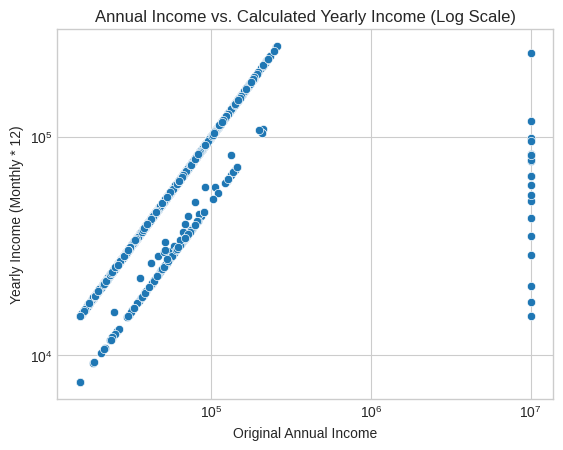

In [ ]:
sns.scatterplot(data=df, x='AnnualIncome', y='YearlyIncome')

plt.xscale('log')
plt.yscale('log')

plt.title('Annual Income vs. Calculated Yearly Income (Log Scale)')
plt.xlabel('Original Annual Income')
plt.ylabel('Yearly Income (Monthly * 12)')
plt.grid(True)
plt.show()

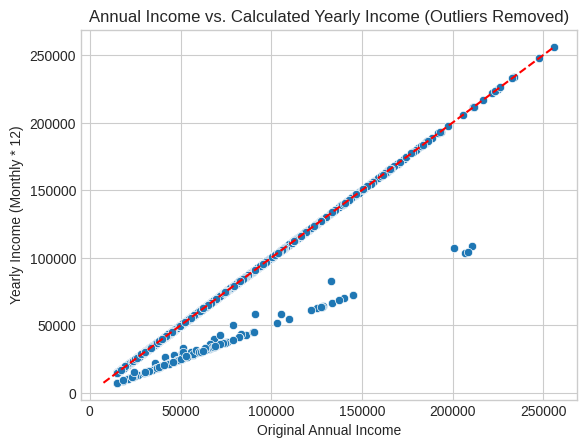

In [ ]:
quantile_99 = df['AnnualIncome'].quantile(0.99)

df_filtered = df[df['AnnualIncome'] < quantile_99]

sns.scatterplot(data=df_filtered, x='AnnualIncome', y='YearlyIncome')

min_val = min(df_filtered['AnnualIncome'].min(), df_filtered['YearlyIncome'].min())
max_val = max(df_filtered['AnnualIncome'].max(), df_filtered['YearlyIncome'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.title('Annual Income vs. Calculated Yearly Income (Outliers Removed)')
plt.xlabel('Original Annual Income')
plt.ylabel('Yearly Income (Monthly * 12)')
plt.grid(True)
plt.show()

Can't exactly say annualincome = monthlyincome *12


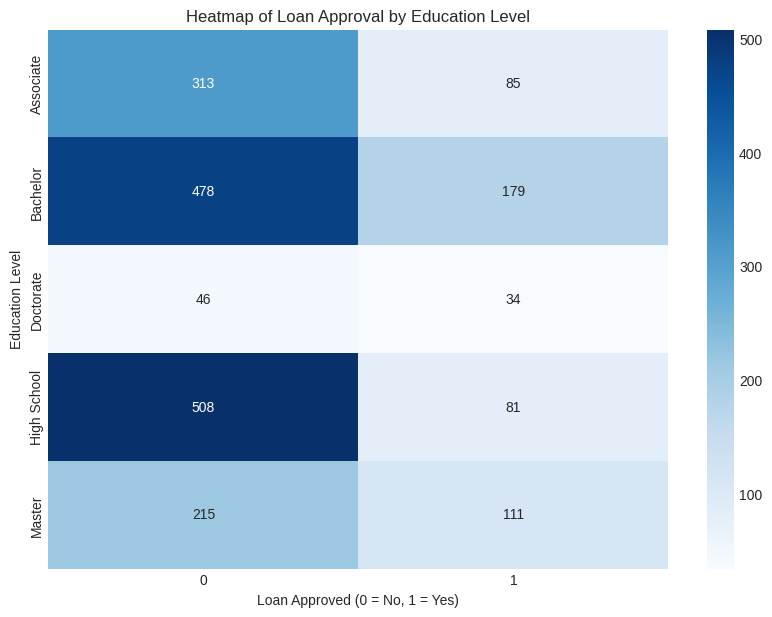

In [288]:
contingency_table = pd.crosstab(df['EducationLevel'], df['LoanApproved'])

# 2. Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(contingency_table, 
            annot=True,     # Show the numbers in the cells
            fmt='d',        # Format the numbers as integers
            cmap='Blues')   # Choose a color map

plt.title('Heatmap of Loan Approval by Education Level')
plt.ylabel('Education Level')
plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
plt.show()

In [315]:
def plot_categorical_vs_target(df, categorical_col, target_col):
    fig, axes = plt.subplots(2, 3, figsize=(22, 14))
    fig.suptitle(f'Heatmap Analysis of {target_col} by {categorical_col}', fontsize=16)


    # --- Heatmap 1: Frequency of each Education Level ---
    # Note: A heatmap is 2D, so we convert the 1D frequency count into a one-column DataFrame
    freq_data = df[categorical_col].value_counts().to_frame(name='Count')
    sns.heatmap(ax=axes[0, 0], data=freq_data, annot=True, fmt='d', cmap='cividis', cbar=False)
    axes[0, 0].set_title('Frequency of Applicants')
    axes[0, 0].set_xlabel('')
    axes[0, 0].set_ylabel(categorical_col)


    # --- Heatmap 2: Count of Approvals vs. Denials ---
    count_table = pd.crosstab(df[categorical_col], df[target_col])
    sns.heatmap(ax=axes[0, 1], data=count_table, annot=True, fmt='d', cmap='cividis')
    axes[0, 1].set_title('Approval Counts')
    axes[0, 1].set_xlabel('Loan Approved (0 = No, 1 = Yes)')
    axes[0, 1].set_ylabel('')


    # --- Heatmap 3: Percentage of Approvals vs. Denials ---
    percentage_table = pd.crosstab(df[categorical_col], df[target_col], normalize='index')
    sns.heatmap(ax=axes[0, 2], data=percentage_table, annot=True, fmt='.1%', cmap='cividis')
    axes[0, 2].set_title('Approval Percentages')
    axes[0, 2].set_xlabel('Loan Approved (0 = No, 1 = Yes)')
    axes[0, 2].set_ylabel('')


    # --- Plot 4: Frequency of each category} ---
    sns.countplot(ax=axes[1, 0], data=df, x=categorical_col, palette='cividis')
    axes[1, 0].set_title('Frequency of Applicants')
    axes[1, 0].set_xlabel(categorical_col)
    axes[1, 0].set_ylabel('Total Count')


    # --- Plot 5: Count of target vs. category (Grouped Bar Chart) ---
    count_table = pd.crosstab(df[categorical_col], df[target_col])
    count_table.plot(kind='bar', ax=axes[1, 1], colormap='cividis')
    axes[1, 1].set_title('Approval Counts')
    axes[1, 1].set_xlabel(categorical_col)
    axes[1, 1].set_ylabel('Number of Applicants')
    axes[1, 1].legend(title='Loan Approved', labels=['Denied (0)', 'Approved (1)'])


    # --- Plot 6: Percentage of target vs. category (100% Stacked Bar) ---
    percentage_table = pd.crosstab(df[categorical_col], df[target_col], normalize='index')
    percentage_table.plot(kind='bar', stacked=True, ax=axes[1, 2], colormap='cividis')
    axes[1, 2].set_title('Approval Percentages')
    axes[1, 2].set_xlabel(categorical_col)
    axes[1, 2].set_ylabel('Percentage')
    axes[1, 2].legend(title='Loan Approved', labels=['Denied (0)', 'Approved (1)'])

    # Adjust layout and display the plots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

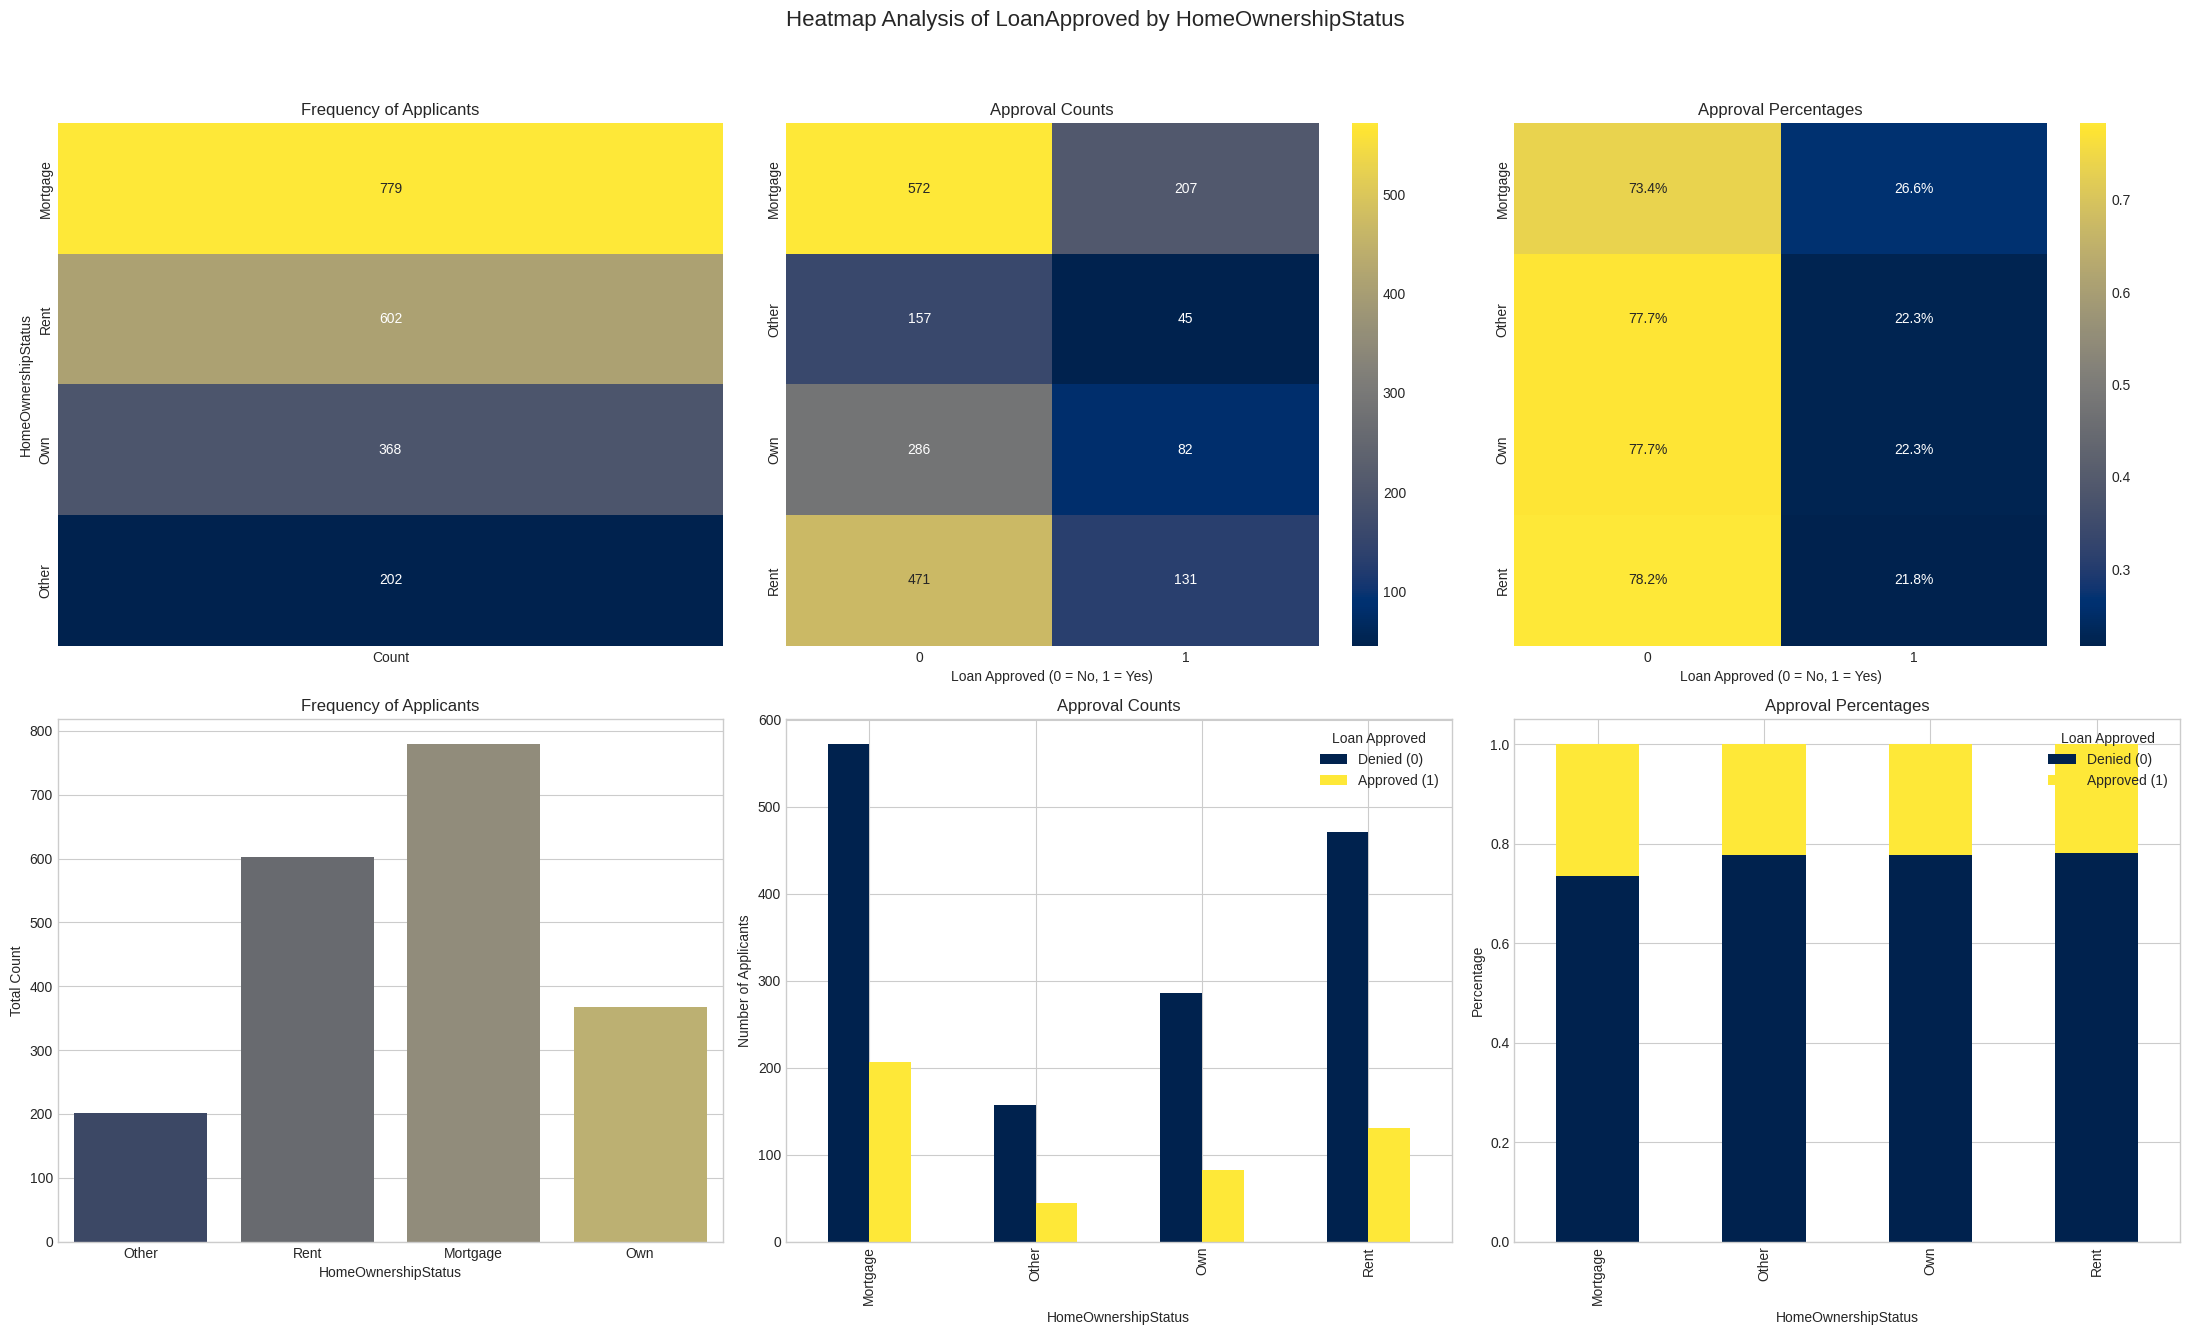

In [316]:
plot_categorical_vs_target(df, categorical_col='HomeOwnershipStatus', target_col='LoanApproved')

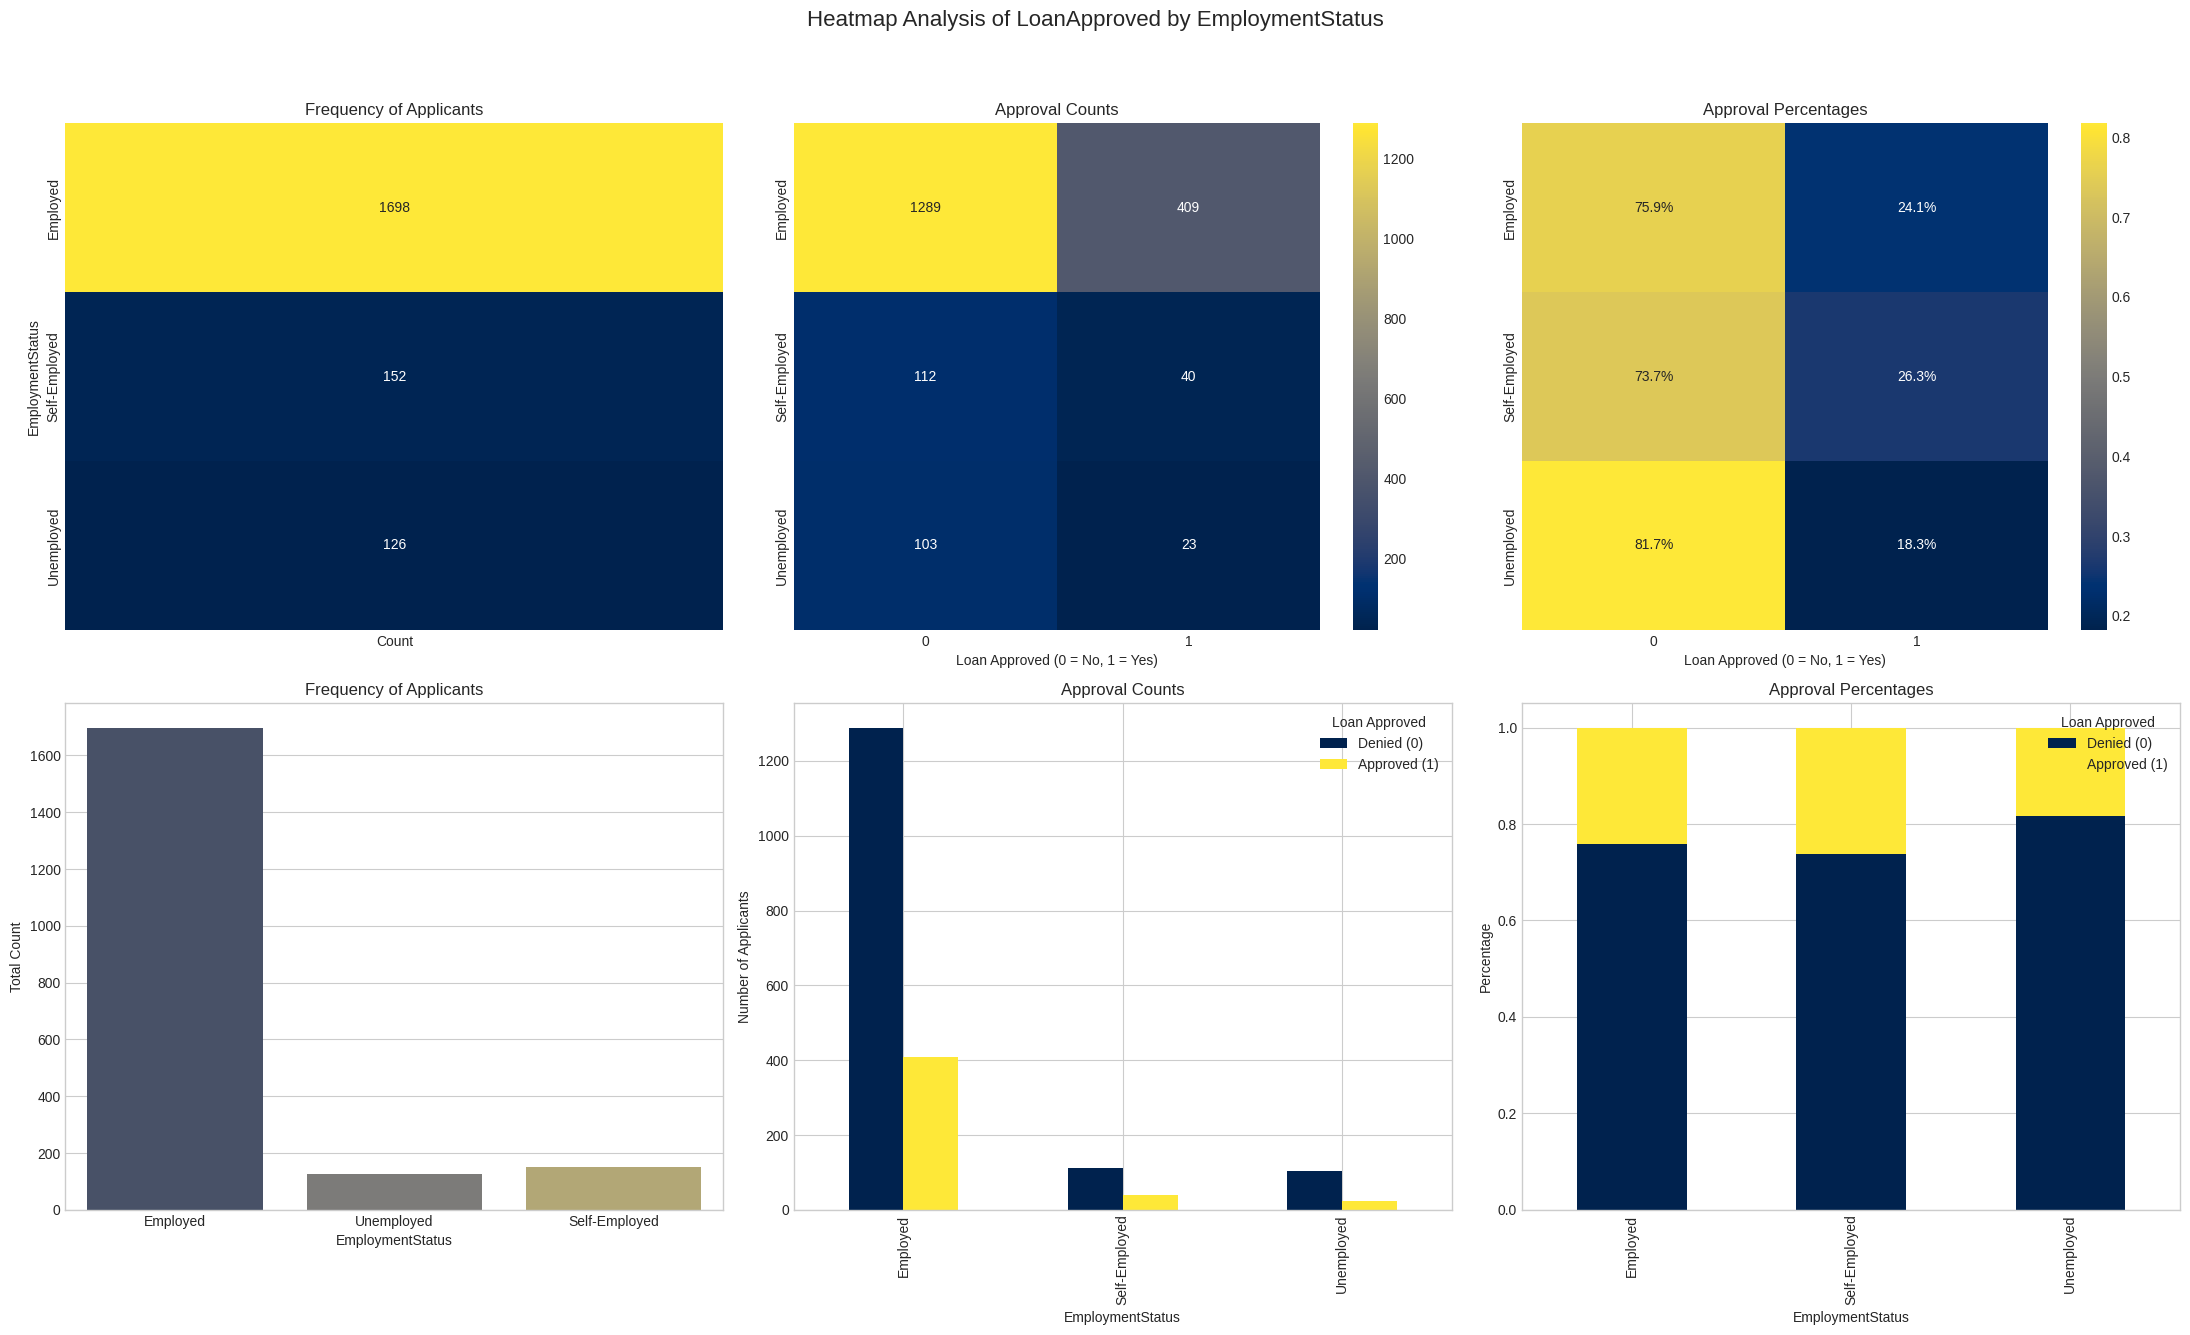

In [317]:
plot_categorical_vs_target(df, categorical_col='EmploymentStatus', target_col='LoanApproved')

WTF all of them are nearly the same 